In [1]:
#@title Librerías 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Introducción a Curve_Fit

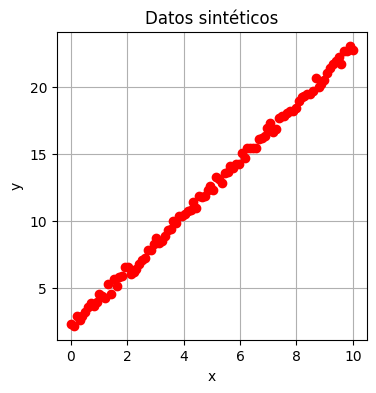

In [2]:
#trabajando con datos sintéticos
x=np.linspace(0,10,100)
b=2
#Números aleatorios entre -1 y 1 
rng=0.5*(2*np.random.random(100)-1)
y=2.1*x+b+rng

plt.figure(figsize=(4,4))
plt.plot(x,y,"ro")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos sintéticos')
plt.grid()

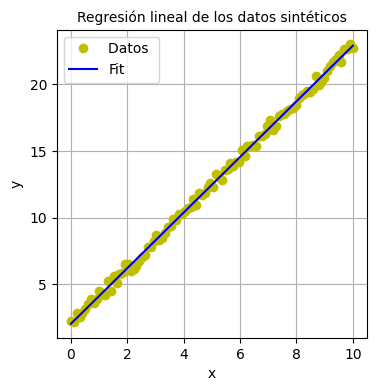

In [3]:
#realizando el fit de los datos 
#se necesita una funcion 
def func(x,a,b):
  return a*x+b

params_fit=curve_fit(func,x,y)
#Graficando los datos con el ajuste 
X=np.linspace(min(x),max(x),1000)
Yfit=func(X,*params_fit[0])
plt.figure(figsize=(4,4))
plt.plot(x,y,"yo",label='Datos ')
plt.plot(X,Yfit,color='blue',label='Fit')
plt.xlabel('x')
plt.title('Regresión lineal de los datos sintéticos',size=10)
plt.ylabel('y')
plt.grid()
plt.legend()

# **DATOS EXPERIMENTALES DE UN PÉNDULO**

In [4]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vS0NVEfQgXY4AM9YCdjw0ecBBZd20Al65XtdslE39xeTlOb6md0cpvlYuH43t8CRW3oiy6lj9UfkyM7/pub?output=csv"
df=pd.read_csv(url,sep=';',decimal='.')
df=df.rename(columns={'Tiempo (ms)': "Tiempo[ms]", 'Ángulo 1,': 'AnguloDeg'})
df.AnguloDeg=df.AnguloDeg.str.replace(',','.').astype(float)
df["AnguloDeg"]=np.deg2rad(df.AnguloDeg)

#tiempo en segundos y radianes 

x=df['Tiempo[ms]']/1000
y=df['AnguloDeg']
A=2
C=1
#Definiendo la funcion para usar curve_fit
def funcion(x,A,aplha,C,omega,phi):
  return C+A*np.exp(-aplha*x)*np.cos(omega*x+phi)

Params=curve_fit(funcion,x,y)[0]
# Extraer los parámetros ajustados
alpha_=Params[2]
omega_=Params[3]
phi_=Params[4]

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


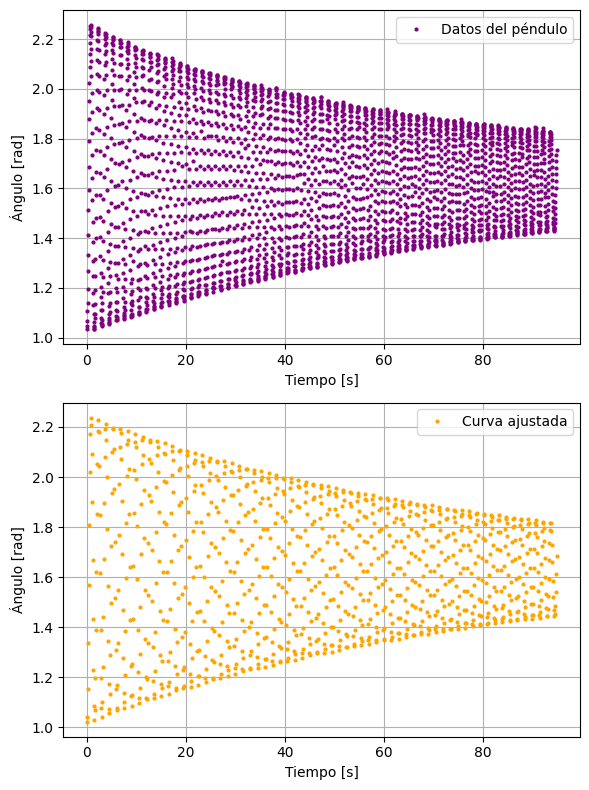

In [7]:
# Calculando  los valores ajustados
t= np.linspace(min(x), max(x), 1000)
y_fit = funcion(t,*Params)

# Graficar los datos del péndulo
fig, axs = plt.subplots(2, 1, figsize=(6, 8))
axs[0].plot(x, y, 'o', color='purple', label='Datos del péndulo',markersize=2)  # Ajustar markersize
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('Ángulo [rad]')
axs[0].legend()
axs[0].grid()
axs[1].plot(t, y_fit,'o',color='orange', label='Curva ajustada',markersize=2)
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Ángulo [rad]')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

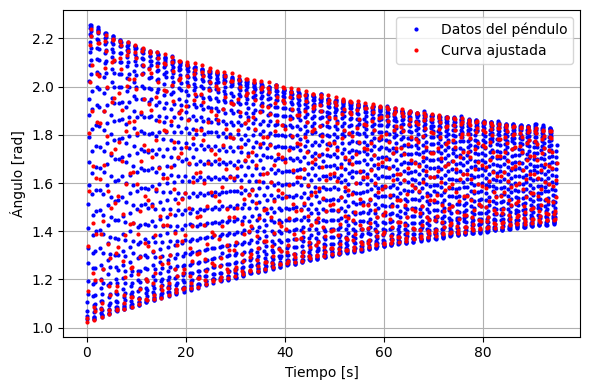

In [8]:
#@title Superposición de los Datos experimentales y los ajustados por medio de curve_fit
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o', color='blue', label='Datos del péndulo', markersize=2)
plt.plot(t, y_fit, 'o', color='red', label='Curva ajustada', markersize=2)
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()